# Import modules

In [28]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import roc_auc_score
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import sklearn
import os
from pathlib import Path
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(30)

In [30]:
from tensorflow.keras.metrics import TruePositives, TrueNegatives, FalsePositives, FalseNegatives 
from numpy import sqrt, diag, zeros
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.utils import resample

# Data Preprocessing

## Import data

In [ ]:
data_path = '/content/drive/Shareddrives/PC_Backup/Final/Multimedia Term Project/dataset/integrated_rescaled_all.csv'
data = pd.read_csv(data_path)

In [ ]:
data_path = '/content/drive/Shareddrives/PC_Backup/Final/Multimedia Term Project/dataset/rescaled_all_frames/all_training_dataset.csv'
data = pd.read_csv(data_path)

In [ ]:
data = pd.read_csv('/content/frame_added_and_standardizedstandard_frame_added_all_training.csv')

## Data Split

In [ ]:
if "Set" not in data.columns:
  data["Set"] = np.random.choice(["train","valid","test"], p=[.8,.1,.1],size=(data.shape[0]))

In [ ]:
if "Set" not in data.columns:
  data["Set"] = np.random.choice(["train","valid","test"], p=[.6,.3,.1],size=(data.shape[0]))

In [ ]:
train_indices = data[data.Set=="train"].index
valid_indices = data[data.Set=="valid"].index
test_indices  = data[data.Set=="test"].index

In [ ]:
nunique = data.nunique()
types = data.dtypes
unused_feat = ['Set','frame_num','participant', 'event', 'TEMP']
features = [ col for col in data.columns if col not in unused_feat]
features_event = features+['event']

Finding data count for each event

In [ ]:
# Count samples per class
classes_0 = data[data['event'] == 0]
classes_1 = data[data['event'] == 1]
classes_2 = data[data['event'] == 2]
classes_3 = data[data['event'] == 3]
classes_4 = data[data['event'] == 4]
classes_5 = data[data['event'] == 5]

# Convert parts into NumPy arrays for weight computation
zero_numpy = classes_0['event'].to_numpy()
one_numpy = classes_1['event'].to_numpy()
two_numpy = classes_2['event'].to_numpy()
three_numpy = classes_3['event'].to_numpy()
four_numpy = classes_4['event'].to_numpy()
five_numpy = classes_5['event'].to_numpy()
all_together = np.concatenate((zero_numpy, one_numpy, two_numpy, three_numpy, four_numpy, five_numpy))
unique_classes = np.unique(all_together)

# Compute weights
weights = sklearn.utils.class_weight.compute_class_weight('balanced', classes=np.unique(unique_classes),  y=all_together)

class_weights = { 0: weights[0],
                1: weights[1],
                2: weights[2],
                3: weights[3],
                4: weights[4],
                5: weights[5]}
print(class_weights)

{0: 1352.7438271604938, 1: 1554.2163120567375, 2: 1248.6866096866097, 3: 1554.2163120567375, 4: 241.08305830583058, 5: 0.1668606379847998}


Splitting into training, validating, testing data

In [ ]:
X_train = data[features].values[train_indices]
y_train = data["event"].values[train_indices]
data_train = data[features_event].values[train_indices]

X_valid = data[features].values[valid_indices]
y_valid = data["event"].values[valid_indices]
data_valid = data[features_event].values[valid_indices]

X_test = data[features].values[test_indices]
y_test = data["event"].values[test_indices]

## Upsampling training dataset

Finding data count for each event in training dataset
The data is very imbalanced:-


---



*   *tensorflow tutorial:https://www.tensorflow.org/tutorials/structured_data/imbalanced_data*
*   *Tour of evaluation metrics for imbalanced classification: https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/*






In [ ]:
# Count samples per class
classes_0_train = data_train[data_train[:,3] == 0]
classes_1_train = data_train[data_train[:,3] == 1]
classes_2_train = data_train[data_train[:,3] == 2]
classes_3_train = data_train[data_train[:,3] == 3]
classes_4_train = data_train[data_train[:,3] == 4]
classes_5_train = data_train[data_train[:,3] == 5]

***sklearn.utils.resample*** API:
https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

In [ ]:
X_train_resample_0 = resample(classes_0_train,
             replace=True,
             #n_samples=len(classes_0_train),
             n_samples=477,
             random_state=42)

X_train_resample_1 = resample(classes_1_train,
             replace=True,
             #n_samples=len(classes_0_train),
             n_samples=477,
             random_state=42)

X_train_resample_2 = resample(classes_2_train,
             replace=True,
             #n_samples=len(classes_0_train),
             n_samples=477,
             random_state=42)

X_train_resample_3 = resample(classes_3_train,
             replace=True,
             #n_samples=len(classes_0_train),
             n_samples=477,
             random_state=42)

X_train_resample_5 = resample(classes_5_train,
             replace=True,
             #n_samples=len(classes_0_train),
             n_samples=477,
             random_state=42)

#X_train_resample = np.append(X_train_resample,classes_0_train,axis=0)
#X_train_resample = np.append(X_train_resample,classes_1_train,axis=0)
#X_train_resample = np.append(X_train_resample,classes_2_train,axis=0)
#X_train_resample = np.append(X_train_resample,classes_3_train,axis=0)
#X_train_resample = np.append(X_train_resample,classes_4_train,axis=0)

X_train_resample = classes_4_train
X_train_resample = np.append(X_train_resample,X_train_resample_0,axis=0)
X_train_resample = np.append(X_train_resample,X_train_resample_1,axis=0)
X_train_resample = np.append(X_train_resample,X_train_resample_2,axis=0)
X_train_resample = np.append(X_train_resample,X_train_resample_3,axis=0)
X_train_resample = np.append(X_train_resample,X_train_resample_5,axis=0)

In [ ]:
X_train = X_train_resample[:,0:3]
y_train = X_train_resample[:,3]

## Use One-hot encoding for training and validation set

In [ ]:
num_categories = 6
y_train_cat = keras.utils.to_categorical(y_train, num_categories)
y_valid_cat = keras.utils.to_categorical(y_valid, num_categories)

Ignore this

In [ ]:
#def g_mean(y_true, y_pred):
#  cnf = tf.math.confusion_matrix(y_true.numpy(), y_pred.numpy(), num_classes=6)
#  cnf_matrix = cnf.numpy()
#  FP = cnf_matrix.sum(axis=0) - diag(cnf_matrix) 
#  FN = cnf_matrix.sum(axis=1) - diag(cnf_matrix)
#  TP = diag(cnf_matrix)
#  TN = cnf_matrix.sum() - (FP + FN + TP)
#  FP = FP.astype(float).sum()
#  FN = FN.astype(float).sum()
#  TP = TP.astype(float).sum()
#  TN = TN.astype(float).sum()
#  sensitivity = TP/(TP+FN)
#  specificity = TN/(FP+TN)
#  return sqrt(sensitivity*specificity)
#
#def weighted_categorical_crossentropy(y_true,y_pred):
#  m = tf.keras.metrics.CategoricalCrossentropy(name="categorical_crossentropy",)
#  m.update_state(y_true, y_pred,
#        #sample_weight=tf.constant([2,2,2,2,2,1])
#  )
#  return m.result()

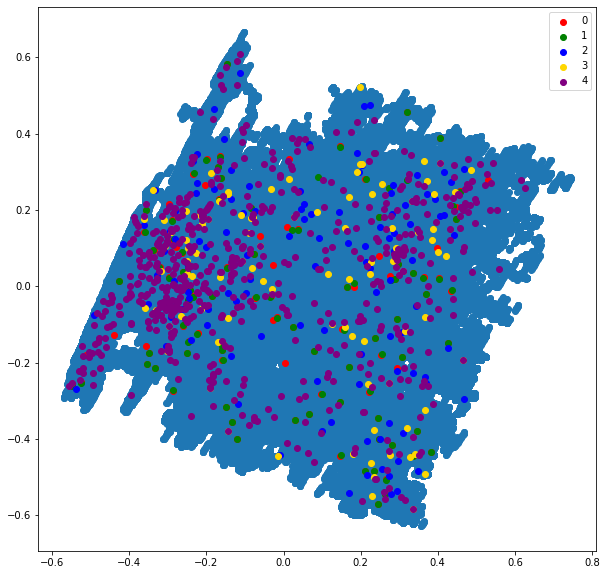

In [31]:
from sklearn.decomposition import PCA
PCA_model = PCA(n_components=2,random_state=42)
data_transformed = PCA_model.fit_transform(data[features], data["event"])
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

ax0.scatter(data_transformed.T[0],data_transformed.T[1])
for l,c in zip((np.unique(data["event"])),['red','green','blue','gold','purple']):
    ax0.scatter(data_transformed.T[0,data["event"]==l],data_transformed.T[1,data["event"]==l],c=c,label=l)

ax0.legend()
plt.show()

# Model Training

## Model Building

Choose one of the following three model:

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=2862, activation='relu', input_shape=(4,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 6, activation='softmax'))

or

In [ ]:
model.add(Embedding(16384, 10, input_length=4))
# Add LSTM layer with 100 units
model.add(LSTM(100))
model.add(Dropout(0.1))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(6, activation='softmax'))

or

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(
            3000, activation="relu", input_shape=(3,)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(6, activation="softmax"),
    ]
)

SUMMARY

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              12000     
                                                                 
 dense_1 (Dense)             (None, 256)               768256    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 847,590
Trainable params: 847,590
Non-trai

## Model Compiling

Selecting metrics:
https://www.tensorflow.org/api_docs/python/tf/keras/metrics

Selecting losses:
https://www.tensorflow.org/api_docs/python/tf/keras/losses


Metrics and Losses
*   https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy
*   https://www.tensorflow.org/api_docs/python/tf/keras/metrics/OneHotIoU
*   https://www.tensorflow.org/api_docs/python/tf/keras/metrics/OneHotMeanIoU
*   https://www.tensorflow.org/api_docs/python/tf/keras/metrics/SensitivityAtSpecificity
*   https://www.tensorflow.org/api_docs/python/tf/keras/metrics/CategoricalAccuracy


In [ ]:
weighted_metrics = [
                    keras.metrics.CategoricalAccuracy(name="CA"),
                    tf.keras.metrics.OneHotMeanIoU(num_classes=6),
                    #tf.keras.metrics.OneHotIoU(num_classes=6, target_class_ids=[0,1,2,3,4]),
                    #keras.metrics.SpecificityAtSensitivity(0.5,name="Specificity"),
                    keras.metrics.Precision(name="Precision")
                ]

Class weight from all datas

In [ ]:
class_w_list = [1352.7438271604938,1554.2163120567375,1248.6866096866097,1554.2163120567375,241.08305830583058,0.1668606379847998]
print(class_w_list)

[1352.7438271604938, 1554.2163120567375, 1248.6866096866097, 1554.2163120567375, 241.08305830583058, 0.1668606379847998]


In [ ]:
model.compile(
    loss='categorical_crossentropy', 
    loss_weights=class_w_list,
    weighted_metrics=weighted_metrics, 
    optimizer='adam')
callbacks = [keras.callbacks.ModelCheckpoint("classification_{epoch}.h5")]

In [ ]:
EPOCHS = 20

## Model Fitting

https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e

In [ ]:
history = model.fit(
    X_train, y_train_cat, verbose=1, 
    validation_data=(X_valid, y_valid_cat),
    class_weight=class_weights,
    use_multiprocessing=True,
    epochs=EPOCHS,
    #callbacks=[early_stopping],
)

## Visualizing Training

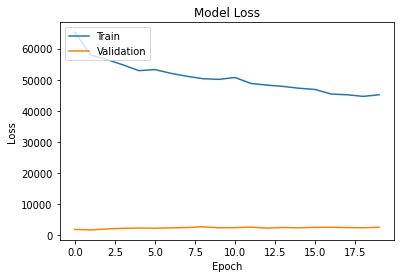

In [ ]:
#  "Accuracy"
#plt.plot(history.history['categorical_crossentropy'])
#plt.plot(history.history['val_categorical_crossentropy'])
#plt.title('Model Crossentropy')
#plt.ylabel('Cat Crossentropy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing Model

In [ ]:
prediction = model.predict(X_test)

In [ ]:
dictionary={0:0,1:1,2:2,3:3,4:4,5:5}

In [ ]:
result = list(map(lambda x: np.argmax(x), prediction))

In [ ]:
print(result)
print(y_test)

In [ ]:
y_test_list=y_test.tolist()
#accuracy_score(y_test_list, result)
#classification_report(y_test_list, result)
f1_score(y_test_list, result, average='weighted')

4.598115578456048e-07

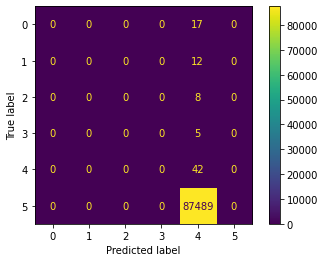

In [ ]:
cmx = confusion_matrix(y_test_list, result)
disp = ConfusionMatrixDisplay(cmx)
disp.plot()
plt.show()

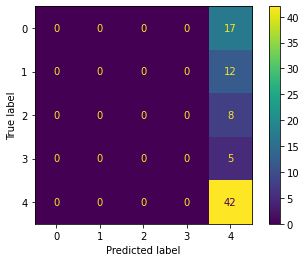

In [ ]:
cmx_event_only = np.delete(cmx, 5, 1)
cmx_event_only = np.delete(cmx_event_only, 5, 0)
disp_events = ConfusionMatrixDisplay(cmx_event_only)
disp_events.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_list, result))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         5
           4       0.00      1.00      0.00        42
           5       0.00      0.00      0.00     87489

    accuracy                           0.00     87573
   macro avg       0.00      0.17      0.00     87573
weighted avg       0.00      0.00      0.00     87573



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
prediction_train = model.predict(X_train)
result_train = list(map(lambda x: np.argmax(x), prediction_train))
y_train_list=y_train.tolist()
cmx_train = confusion_matrix(y_train_list, result_train)
disp = ConfusionMatrixDisplay(cmx_train)
disp.plot()
plt.show()

## Testing by participant set

In [ ]:
test_path = '/content/drive/Shareddrives/PC_Backup/Final/Multimedia Term Project/dataset/rescaled_all_frames/all_frames_1.csv'
test_data = pd.read_csv(test_path)

In [ ]:
unused_feat = ['Set','frame_num','participant']
features = [ col for col in test_data.columns if col not in unused_feat]
X_final_test = test_data[features].values[:]
y_final_test = test_data["event"].values[:]

In [ ]:
prediction = model.predict(X_final_test)

In [ ]:
dictionary={0:0,1:1,2:2,3:3,4:4,5:5}
result = list(map(lambda x: np.argmax(x), prediction))
y_final_test_list=y_final_test.tolist()
accuracy_score(y_final_test_list, result)

In [ ]:
cmx_final_test = confusion_matrix(y_final_test_list, result)
disp_final_test = ConfusionMatrixDisplay(cmx_final_test)
disp_final_test.plot()
plt.show()

# Saving Model

In [ ]:
import tensorflow as tf

In [ ]:
tf.saved_model.save(model, './LSTM_Model')

In [ ]:
!zip -r /content/LSTM_Model.zip /content/LSTM_Model/

In [ ]:
model.save('Model_3.h5')

In [ ]:
from keras.models import load_model
model = load_model('Model.h5')

In [ ]:
!zip -r /content/Model.zip /content/Model/